In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

labels = pd.read_excel("aggregateRockData.xlsx",header=None)[1]

# features = pd.read_csv("feature_presence540.txt", delimiter=r'\s',header=None).iloc[:,2:15]
features = pd.read_csv("feature_presence540.txt", delim_whitespace=True, usecols=range(1,14),header=None)

In [2]:
features.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,1,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,1,2,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,1,3,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,1,4,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,1,5,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05


In [3]:
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int64

In [4]:
combined_data = pd.concat([labels, features], axis=1)
#combined_data[1] = combined_data[1].fillna(0).astype(int)

temp_df = combined_data
temp_df.head()

,1,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,1,1,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,1.0,1,2,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,1.0,1,3,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,1.0,1,4,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,1.0,1,5,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05


In [5]:
df = temp_df.iloc[:480]
len(df)

480

In [6]:
column_names = [
"Rock category number",
"Subtype number",
"Token number",
"Angular fragments",
"Rounded fragments",
"Straight stripes",
"Curved stripes",
"Physical layers",
"Veins",
"Oily/shimmery texture",
"Splotchy texture",
"Single translucent crystal",
"Multiple cubic crystals",
"Sandy texture",
]
df.columns=column_names
df.head()

,Rock category number,Subtype number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
0,1.0,1,1,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,1.0,1,2,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,1.0,1,3,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,1.0,1,4,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,1.0,1,5,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05


In [7]:
df.shape
# print(type(df))

(480, 14)

In [8]:
df.describe()

,Rock category number,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,2.000000,0.042292,0.165146,0.052396,0.144479,0.141458,0.031667,0.025104,0.119854
std,0.817348,0.160970,0.216635,0.102676,0.265689,0.168222,0.135647,0.112153,0.173149
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.050000
75%,3.000000,0.000000,0.212500,0.050000,0.100000,0.200000,0.000000,0.000000,0.150000
max,3.000000,1.000000,0.950000,0.900000,1.000000,0.950000,1.000000,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rock category number        480 non-null    float64
 1   Subtype number              480 non-null    object 
 2   Token number                480 non-null    object 
 3   Angular fragments           480 non-null    object 
 4   Rounded fragments           480 non-null    object 
 5   Straight stripes            480 non-null    object 
 6   Curved stripes              480 non-null    float64
 7   Physical layers             480 non-null    float64
 8   Veins                       480 non-null    float64
 9   Oily/shimmery texture       480 non-null    float64
 10  Splotchy texture            480 non-null    float64
 11  Single translucent crystal  480 non-null    float64
 12  Multiple cubic crystals     480 non-null    float64
 13  Sandy texture               480 non

In [10]:
df.isnull().sum()

Rock category number          0
Subtype number                0
Token number                  0
Angular fragments             0
Rounded fragments             0
Straight stripes              0
Curved stripes                0
Physical layers               0
Veins                         0
Oily/shimmery texture         0
Splotchy texture              0
Single translucent crystal    0
Multiple cubic crystals       0
Sandy texture                 0
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer

numerical_cols = ['Subtype number', 'Token number', 'Sandy texture']

num_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

print(df.isnull().sum())
# df.info()

Rock category number          0
Subtype number                0
Token number                  0
Angular fragments             0
Rounded fragments             0
Straight stripes              0
Curved stripes                0
Physical layers               0
Veins                         0
Oily/shimmery texture         0
Splotchy texture              0
Single translucent crystal    0
Multiple cubic crystals       0
Sandy texture                 0
dtype: int64


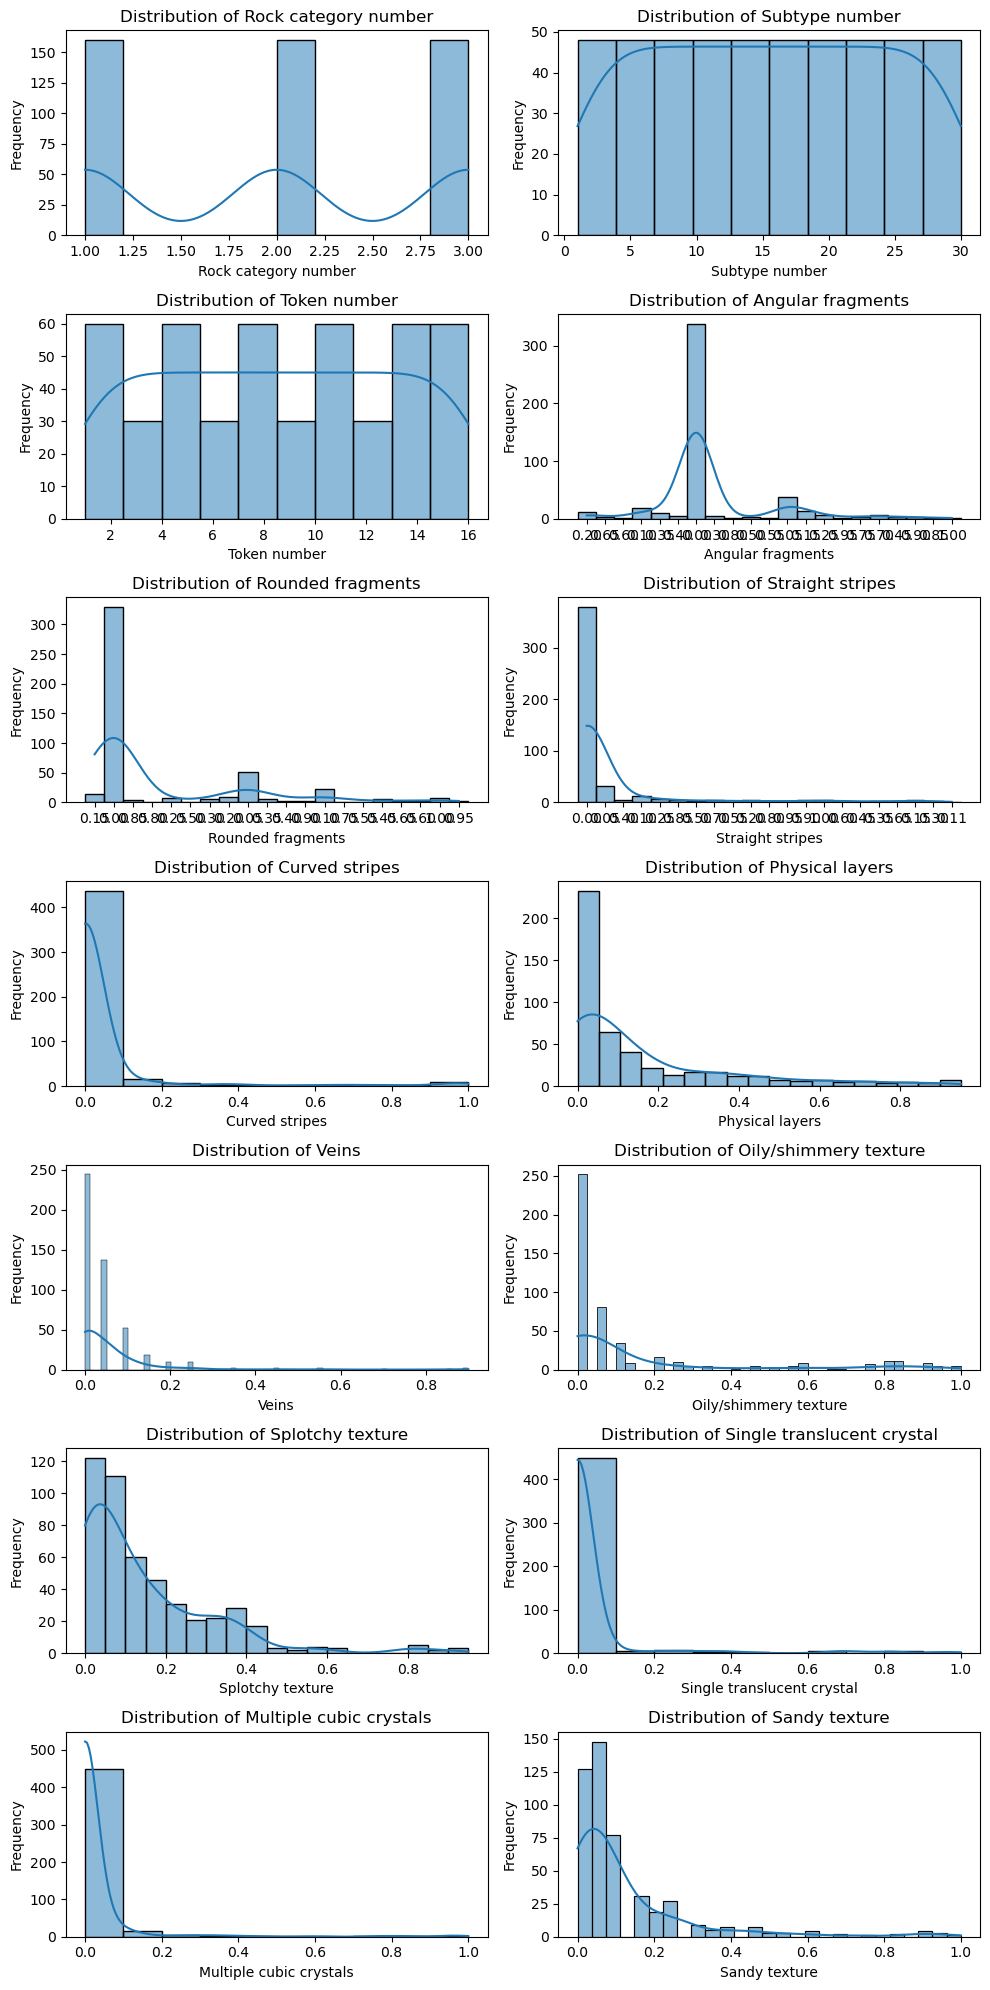

In [23]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(df.columns):
    plt.subplot(7, 2, i+1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

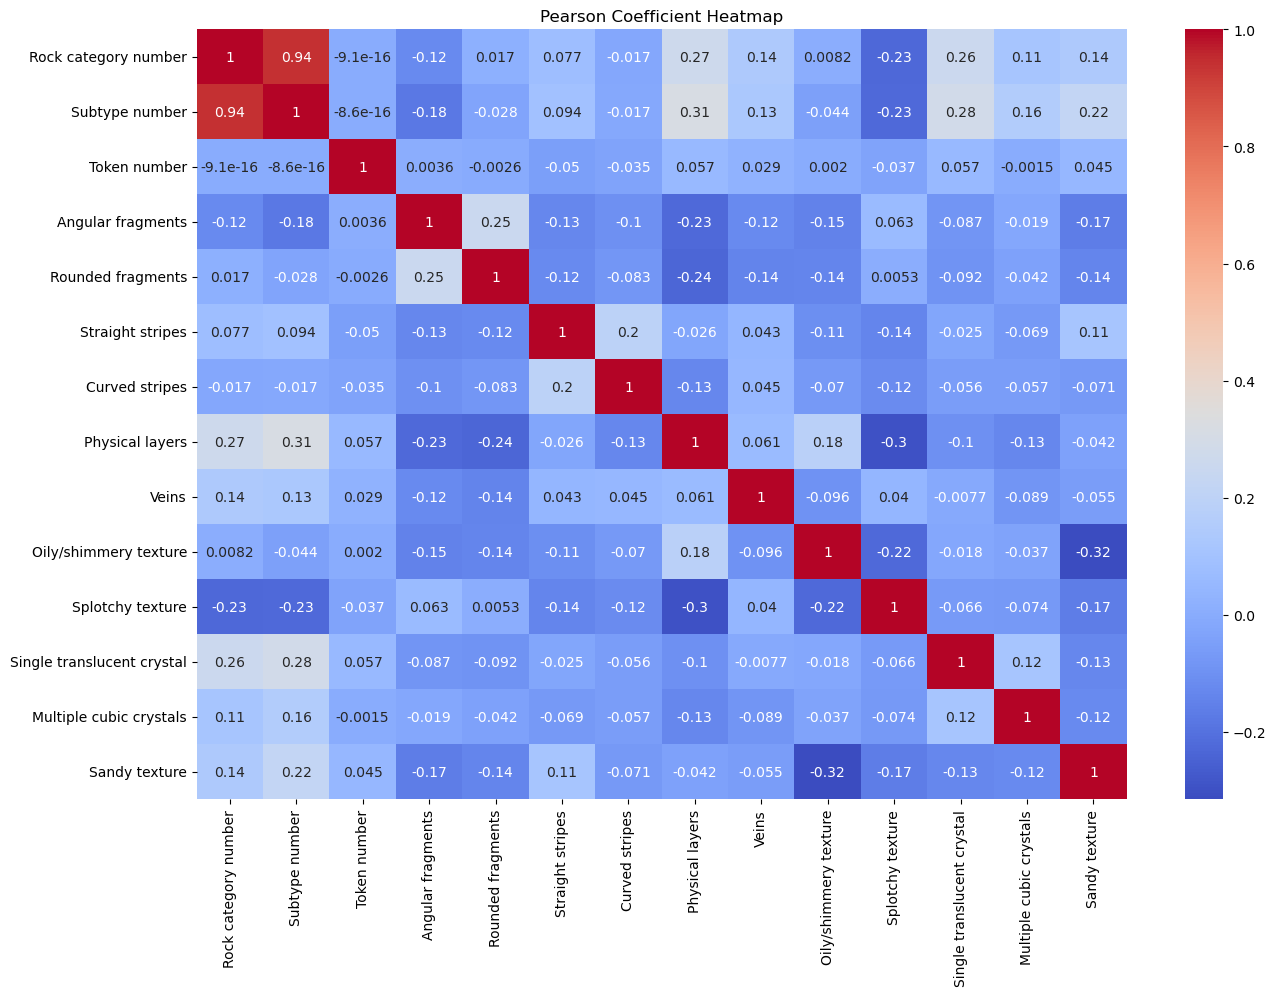

In [24]:
correlation_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot = True, cmap= 'coolwarm' )
plt.title('Pearson Coefficient Heatmap')
plt.show()

In [25]:
df.corr(method='pearson', numeric_only=True)

,Rock category number,Subtype number,Token number,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
Rock category number,1.000000e+00,9.433333e-01,-9.070297e-16,-0.017454,0.266699,0.140553,0.008172,-0.229273,0.258910,0.113872,0.139845
Subtype number,9.433333e-01,1.000000e+00,-8.577646e-16,-0.016914,0.311519,0.130183,-0.043644,-0.228026,0.281807,0.156563,0.220862
Token number,-9.070297e-16,-8.577646e-16,1.000000e+00,-0.035272,0.057043,0.028530,0.002001,-0.036710,0.057032,-0.001513,0.045294
Curved stripes,-1.745444e-02,-1.691441e-02,-3.527214e-02,1.000000,-0.134700,0.045330,-0.070313,-0.116348,-0.056443,-0.056908,-0.071011
Physical layers,2.666991e-01,3.115185e-01,5.704335e-02,-0.134700,1.000000,0.061391,0.184191,-0.295079,-0.102496,-0.131038,-0.041839
Veins,1.405526e-01,1.301825e-01,2.853021e-02,0.045330,0.061391,1.000000,-0.095940,0.040470,-0.007707,-0.089083,-0.054820
Oily/shimmery texture,8.171521e-03,-4.364353e-02,2.000768e-03,-0.070313,0.184191,-0.095940,1.000000,-0.224798,-0.018165,-0.037376,-0.315414
Splotchy texture,-2.292728e-01,-2.280257e-01,-3.670989e-02,-0.116348,-0.295079,0.040470,-0.224798,1.000000,-0.065659,-0.073539,-0.166148
Single translucent crystal,2.589103e-01,2.818071e-01,5.703188e-02,-0.056443,-0.102496,-0.007707,-0.018165,-0.065659,1.000000,0.115054,-0.134821
Multiple cubic crystals,1.138719e-01,1.565635e-01,-1.512700e-03,-0.056908,-0.131038,-0.089083,-0.037376,-0.073539,0.115054,1.000000,-0.123013


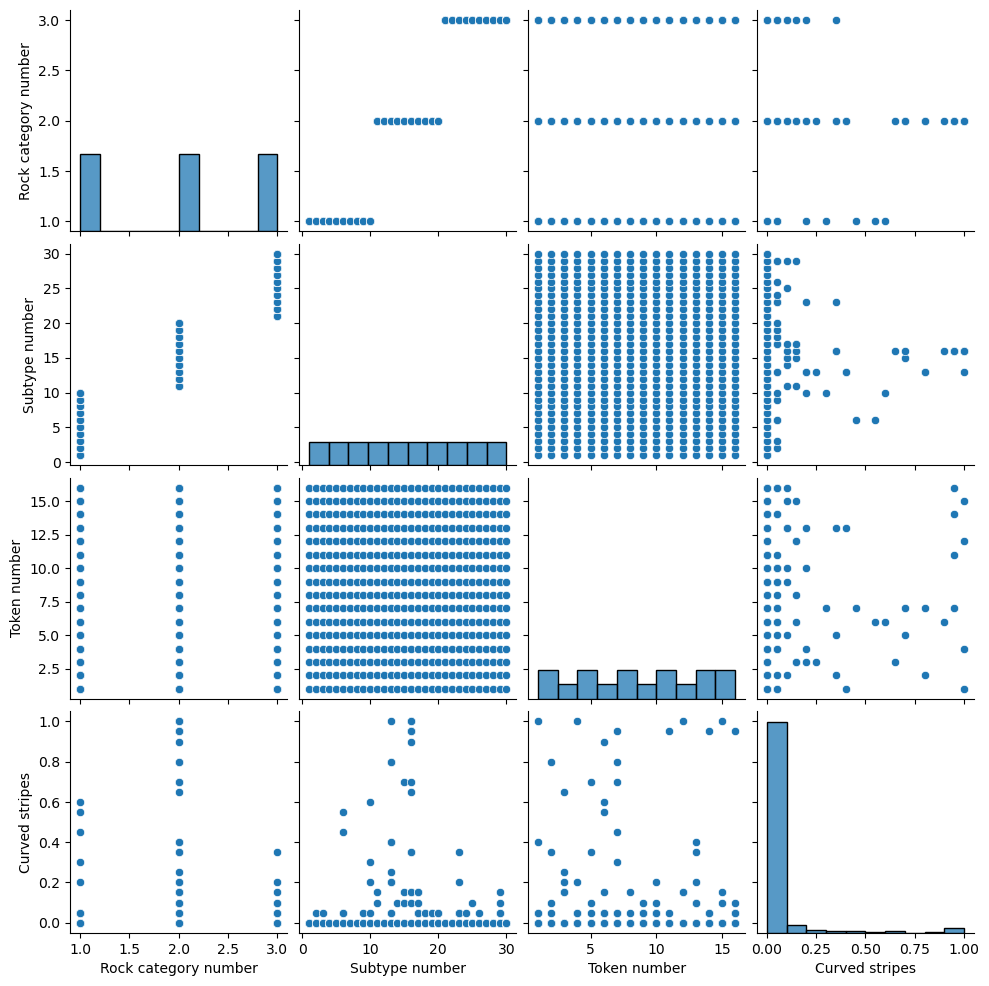

In [26]:
sns.pairplot(df[[
    "Rock category number", "Subtype number", "Token number", "Angular fragments", 
    "Rounded fragments", "Straight stripes", "Curved stripes"
]])
plt.show()

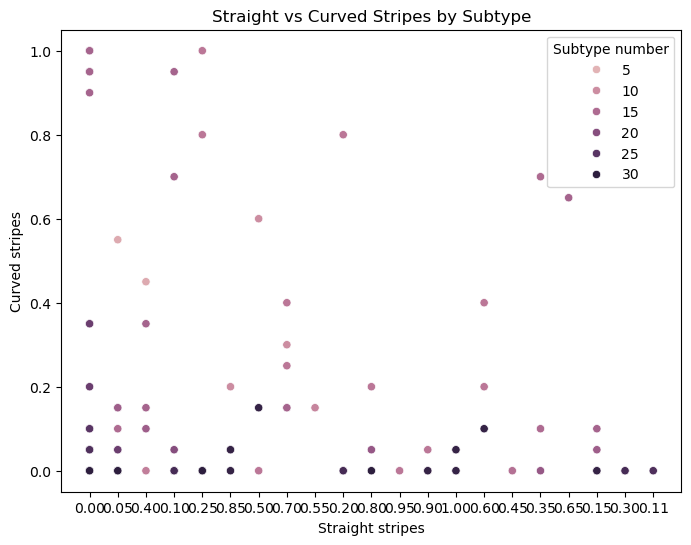

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Straight stripes", y="Curved stripes", hue="Subtype number")
plt.title("Straight vs Curved Stripes by Subtype")
plt.show()

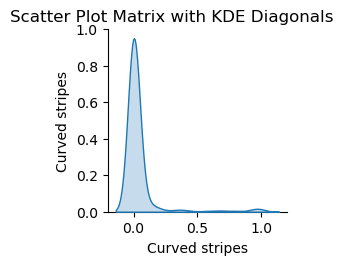

In [31]:
g = sns.pairplot(df[[
    "Angular fragments", "Rounded fragments", "Straight stripes", "Curved stripes"
]], diag_kind="kde")
plt.suptitle("Scatter Plot Matrix with KDE Diagonals", y=1.02)
plt.show()

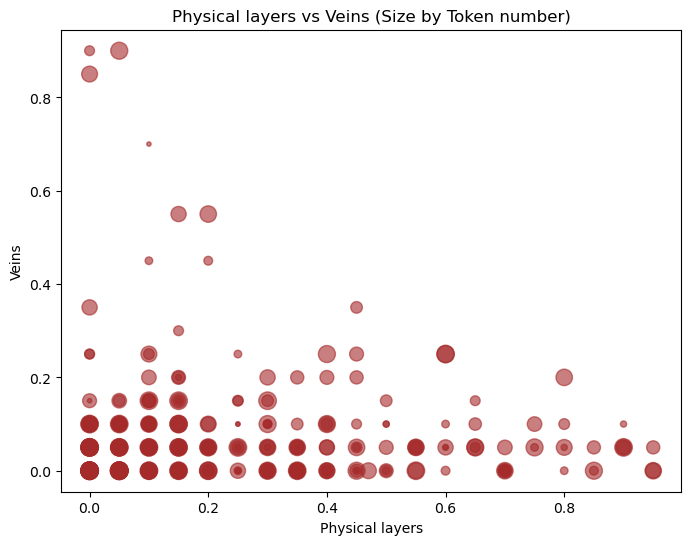

In [32]:

x = df["Physical layers"]
y = df["Veins"]

size_data = df["Token number"].fillna(df["Token number"].median()).astype(float) * 10

if len(x) == len(y) == len(size_data):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, s=size_data, alpha=0.6, c="brown")
    plt.xlabel("Physical layers")
    plt.ylabel("Veins")
    plt.title("Physical layers vs Veins (Size by Token number)")
    plt.show()

In [12]:
# Split based on the 'Token number'
df_train = df[df['Token number'].between(1, 10)]
df_validation = df[df['Token number'].between(11, 13)]
df_test= df[df['Token number'].between(14, 16)]

df_train = df_train.drop('Token number', axis=1)
df_validation = df_validation.drop('Token number', axis=1)
df_test = df_test.drop('Token number', axis=1)

print(df_train.shape)
print(df_validation.shape)
print(df_test.shape)

full_df = df
full_df= full_df.drop('Token number', axis=1)
X_train, Y_train= df_train.drop('Rock category number', axis=1) , df_train['Rock category number']
X_val, Y_val = df_validation.drop('Rock category number', axis=1), df_validation['Rock category number']
X_test, Y_test= df_test.drop('Rock category number', axis=1) , df_test['Rock category number']
X_full, Y_full = full_df.drop('Rock category number', axis=1) , full_df['Rock category number']
print(full_df.shape)

(300, 13)
(90, 13)
(90, 13)
(480, 13)


In [13]:
print(Y_train.value_counts())
print(Y_val.value_counts())
print(Y_test.value_counts())

Rock category number
1.0    100
2.0    100
3.0    100
Name: count, dtype: int64
Rock category number
1.0    30
2.0    30
3.0    30
Name: count, dtype: int64
Rock category number
1.0    30
2.0    30
3.0    30
Name: count, dtype: int64


In [14]:
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Overall set : {df.shape[0]} samples")

Training set: 300 samples
Validation set: 90 samples
Testing set: 90 samples
Overall set : 480 samples


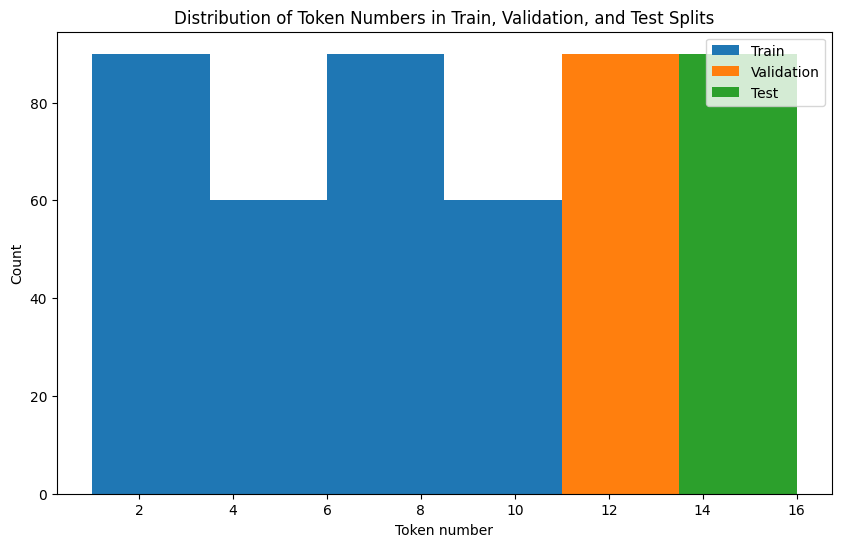

In [15]:
import matplotlib.pyplot as plt

df_train['Split'] = 'Train'
df_validation['Split'] = 'Validation'
df_test['Split'] = 'Test'

df_split = pd.concat([df_train, df_validation, df_test])

plt.figure(figsize=(10, 6))
plt.hist([df[df['Token number'].between(1, 10)]['Token number'],
          df[df['Token number'].between(11, 13)]['Token number'],
          df[df['Token number'].between(14, 16)]['Token number']],
         label=['Train', 'Validation', 'Test'], bins=6, stacked=True)

plt.xlabel('Token number')
plt.ylabel('Count')
plt.title('Distribution of Token Numbers in Train, Validation, and Test Splits')
plt.legend()
plt.show()


In [16]:
features_column_names=df.columns.values.tolist()
for i in features_column_names:
    print(correlation_matrix[i].sort_values(ascending=False))

NameError: name 'correlation_matrix' is not defined

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, accuracy_score,f1_score, recall_score

clf = LogisticRegression(multi_class='multinomial')

param_grid = {
    'C': [0.0001,0.001,0.01, 0.1],#1 10
    'solver': ['newton-cg', 'lbfgs', 'saga'],
    'max_iter': [100,200,300]#100 200 500
}


grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

grid_search.fit(X_train_scaled, Y_train)

best_params = grid_search.best_params_
print("best param:",best_params)

best_clf = LogisticRegression(multi_class='multinomial', C=best_params['C'],
solver=best_params['solver'],max_iter=best_params['max_iter'])
best_clf.fit(X_train_scaled, Y_train)

def evaluate_model(model, X, y, set_name):
    y_pred_log = model.predict(X)
    accuracy_log = accuracy_score(y, y_pred_log)
    precision_log = precision_score(y, y_pred_log, average='weighted')
    recall_log = recall_score(y, y_pred_log, average='weighted')
    f1_log = f1_score(y, y_pred_log, average='weighted')
    print(f"{set_name} Metrics:")
    print(f"Accuracy: {accuracy_log}")
    print(f"Precision: {precision_log}")
    print(f"Recall: {recall_log}")
    print(f"F1 Score: {f1_log}")
# Evaluating the model on the validation and test sets
evaluate_model(best_clf, X_train_scaled, Y_train, "Train")
evaluate_model(best_clf, X_val_scaled, Y_val, "Validation")
evaluate_model(best_clf, X_test_scaled, Y_test, "Test")

best param: {'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg'}
Train Metrics:
Accuracy: 0.9133333333333333
Precision: 0.9133826864078965
Recall: 0.9133333333333333
F1 Score: 0.9132956628996234
Validation Metrics:
Accuracy: 0.8888888888888888
Precision: 0.8894500561167228
Recall: 0.8888888888888888
F1 Score: 0.8876357560568086
Test Metrics:
Accuracy: 0.9666666666666667
Precision: 0.9677419354838709
Recall: 0.9666666666666667
F1 Score: 0.966647823629169


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
# Create an SVM classifier
svm_clf = SVC()
# Define hyperparameters and their ranges for exploration
param_grid = {
    'C': [0.0001, 0.001, 0.01,1,10],  # Adjust to include lower values 0.001.0.1,1,10
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [1, 2, 3],
    'gamma': [0.01, 0.1, 1, 10],#scale and auto
}
# Perform grid search with cross-validation (adjust cv as needed)
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid,cv=10,scoring='accuracy')
# Fit the grid search to your training data
grid_search.fit(X_train_scaled, Y_train)
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("best parameters:", best_params, grid_search.best_score_)
# Train the SVM classifier with the best hyperparameters
best_svm_clf = SVC(**best_params)
best_svm_clf.fit(X_train_scaled, Y_train)
#print("best parameters:", best_svm_clf)


best parameters: {'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'} 0.8733333333333334


SVC(C=1, degree=1, gamma=0.01, kernel='linear')

In [21]:
# Evaluate the model on the validation and test sets
evaluate_model(best_svm_clf, X_train_scaled, Y_train, "Train")
evaluate_model(best_svm_clf, X_val_scaled, Y_val, "Validation")
evaluate_model(best_svm_clf, X_test_scaled, Y_test, "Test")


Train Metrics:
Accuracy: 0.9933333333333333
Precision: 0.9933993399339935
Recall: 0.9933333333333333
F1 Score: 0.9933162470475903
Validation Metrics:
Accuracy: 0.9666666666666667
Precision: 0.9676724137931035
Recall: 0.9666666666666667
F1 Score: 0.9666484417714599
Test Metrics:
Accuracy: 0.9666666666666667
Precision: 0.9670003707823508
Recall: 0.9666666666666667
F1 Score: 0.9666574048346763


Best parameters for Random Forest: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 65, 'min_samples_split': 60, 'n_estimators': 75}
Train Metrics:
Accuracy: 0.94
Precision: 0.9449541284403669
Recall: 0.94
F1 Score: 0.9383248330616752
Validation Metrics:
Accuracy: 0.9444444444444444
Precision: 0.9488636363636365
Recall: 0.9444444444444444
F1 Score: 0.9430712656519107
Test Metrics:
Accuracy: 0.9444444444444444
Precision: 0.9488636363636365
Recall: 0.9444444444444444
F1 Score: 0.9430712656519107


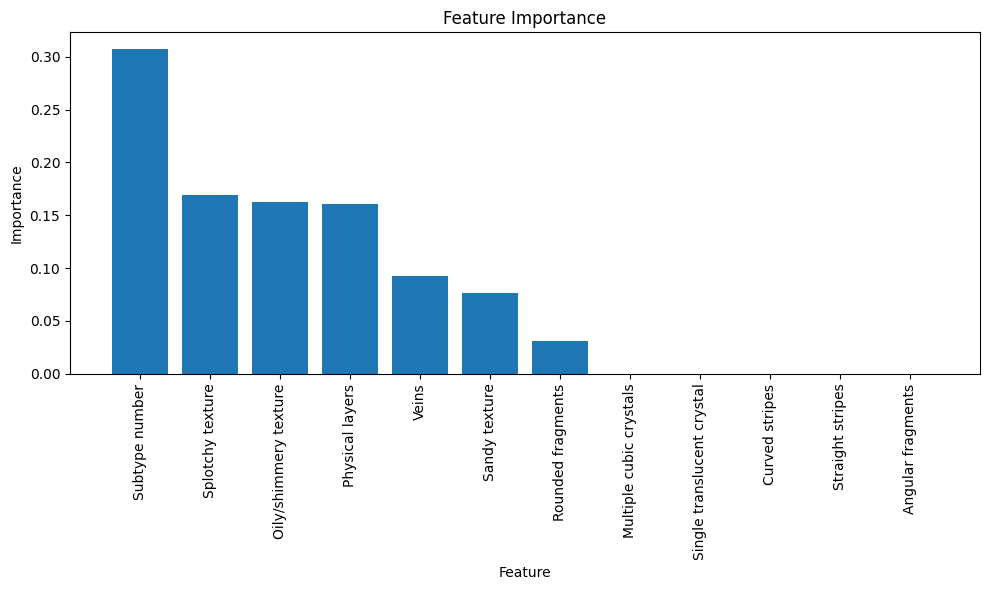

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# # Step 2: Set up the parameter grid for hyperparameter tuning
# param_grid_rf = {
#     'n_estimators': [10, 30, 50, 100,200],  # Fewer trees
#     'max_depth': [None, 4,5,10,15],        # Shallower trees  20 30
#     'min_samples_split': [  5, 10, 15],  # More samples required to split 2 5 10
#     'min_samples_leaf': [ 2, 4, 6,8,10],    # More samples in leaf nodes 1,2,4
#     'max_features': ['sqrt', 'log2',0.5],# The number of features to consider when looking for the best split
#     'class_weight': [None, 'balanced'] 
# }

param_grid_rf = {
    'n_estimators': [50, 75, 100],
    'max_depth': [50, 70, 90],
    'min_samples_split': [60, 75, 90],
    'min_samples_leaf': [65, 75, 85],
    'max_features': ['sqrt', 'log2']
}


#  Perform Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, Y_train)

# Get the best hyperparameters from the grid search
best_params_rf = grid_search_rf.best_params_
print("Best parameters for Random Forest:", best_params_rf)

# Train the Random Forest Classifier with the best hyperparameters
best_rf_clf = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_clf.fit(X_train_scaled, Y_train)
def evaluate_rf_model(model, X, y, set_name):
    y_pred_rf = model.predict(X)
    accuracy_rf = accuracy_score(y, y_pred_rf)
    precision_rf = precision_score(y, y_pred_rf, average='weighted')
    recall_rf = recall_score(y, y_pred_rf, average='weighted')
    f1_rf = f1_score(y, y_pred_rf, average='weighted')
    
    print(f"{set_name} Metrics:")
    print(f"Accuracy: {accuracy_rf}")
    print(f"Precision: {precision_rf}")
    print(f"Recall: {recall_rf}")
    print(f"F1 Score: {f1_rf}")
   # print(classification_report(y, y_pred_rf)) 
# Evaluate the model on the validation and test sets
evaluate_rf_model(best_rf_clf, X_train_scaled, Y_train, "Train")
evaluate_rf_model(best_rf_clf, X_val_scaled, Y_val, "Validation")
evaluate_rf_model(best_rf_clf, X_test_scaled, Y_test, "Test")

def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    plt.bar(range(X_train_scaled.shape[1]), importances[indices], align="center")
    plt.xticks(range(X_train_scaled.shape[1]), np.array(feature_names)[indices], rotation=90)
    plt.xlim([-1, X_train_scaled.shape[1]])
    plt.ylabel("Importance")
    plt.xlabel("Feature")
    plt.tight_layout()
    plt.show()

# Assuming X_train_scaled has feature names in the same order as the original data
# You may need to define feature_names according to your dataset
feature_names = X_train.columns if hasattr(X_train, 'columns') else np.arange(X_train.shape[1])
plot_feature_importance(best_rf_clf, feature_names)

In [27]:
from sklearn.ensemble import StackingClassifier ,GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize individual classifiers
rf_clf = RandomForestClassifier(
    max_depth= 50, max_features= 'sqrt', min_samples_leaf= 65, min_samples_split= 60, n_estimators= 75, random_state=42 
)
# rf_clf = RandomForestClassifier(
#     n_estimators=10, max_depth=None, max_features='sqrt',
#     min_samples_leaf=6, min_samples_split=5, random_state=42 
# )
log_reg = LogisticRegression(
    max_iter=100, solver='newton-cg', random_state=42
)
svm_clf = SVC(
    C=10, kernel='poly', degree=3, gamma='scale', probability=True, random_state=42
)


# Set up the Voting Classifier 
ensemble_model = VotingClassifier(
    estimators=[
        ('random_forest', rf_clf),
        ('logistic_regression', log_reg),
        ('svm', svm_clf)
    ],
    voting='hard'
)

# Fit individual models
rf_clf.fit(X_train_scaled, Y_train)
log_reg.fit(X_train_scaled, Y_train)
svm_clf.fit(X_train_scaled, Y_train)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train_scaled, Y_train)

# Function to evaluate models and print metrics
def evaluate_model(model, X, y, set_name, model_name):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    
    print(f"{model_name} Metrics for {set_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    return f1  # Return F1 score for comparison

# Evaluate individual classifiers on the training set
print("\nEvaluating Individual Classifiers on Training Set:\n")
f1_scores_train = {}
f1_scores_train['Random Forest'] = evaluate_model(rf_clf, X_train_scaled, Y_train, "Train", "Random Forest")
f1_scores_train['Logistic Regression'] = evaluate_model(log_reg, X_train_scaled, Y_train, "Train", "Logistic Regression")
f1_scores_train['SVM'] = evaluate_model(svm_clf, X_train_scaled, Y_train, "Train", "SVM")

# Evaluate the ensemble model on the training set
print("\nEvaluating Ensemble Model on Training Set:\n")
ensemble_f1_train = evaluate_model(ensemble_model, X_train_scaled, Y_train, "Train", "Ensemble Model")

# Evaluate individual classifiers on the test set
print("\nEvaluating Individual Classifiers on Test Set:\n")
f1_scores_test = {}
f1_scores_test['Random Forest'] = evaluate_model(rf_clf, X_test_scaled, Y_test, "Test", "Random Forest")
f1_scores_test['Logistic Regression'] = evaluate_model(log_reg, X_test_scaled, Y_test, "Test", "Logistic Regression")
f1_scores_test['SVM'] = evaluate_model(svm_clf, X_test_scaled, Y_test, "Test", "SVM")

# Evaluate the ensemble model on the test set
print("\nEvaluating Ensemble Model on Test Set:\n")
ensemble_f1_test = evaluate_model(ensemble_model, X_test_scaled, Y_test, "Test", "Ensemble Model")

# Compare F1 scores from training and test sets
print("\nF1 Scores Comparison:")
print(f"Random Forest - Train: {f1_scores_train['Random Forest']:.4f}, Test: {f1_scores_test['Random Forest']:.4f}")
print(f"Logistic Regression - Train: {f1_scores_train['Logistic Regression']:.4f}, Test: {f1_scores_test['Logistic Regression']:.4f}")
print(f"SVM - Train: {f1_scores_train['SVM']:.4f}, Test: {f1_scores_test['SVM']:.4f}")
print(f"Ensemble Model - Train: {ensemble_f1_train:.4f}, Test: {ensemble_f1_test:.4f}")

# Determine the best model based on F1 Score from the test set
best_model_name = max(f1_scores_test, key=f1_scores_test.get)
best_model_score = f1_scores_test[best_model_name]

print(f"\nBest Model on Test Set: {best_model_name} with F1 Score: {best_model_score:.4f}")
print(f"Ensemble Model F1 Score on Test Set: {ensemble_f1_test:.4f}")


Evaluating Individual Classifiers on Training Set:

Random Forest Metrics for Train:
Accuracy: 0.9400
Precision: 0.9450
Recall: 0.9400
F1 Score: 0.9383
Logistic Regression Metrics for Train:
Accuracy: 0.9867
Precision: 0.9868
Recall: 0.9867
F1 Score: 0.9867
SVM Metrics for Train:
Accuracy: 0.9667
Precision: 0.9689
Recall: 0.9667
F1 Score: 0.9669

Evaluating Ensemble Model on Training Set:

Ensemble Model Metrics for Train:
Accuracy: 0.9967
Precision: 0.9967
Recall: 0.9967
F1 Score: 0.9967

Evaluating Individual Classifiers on Test Set:

Random Forest Metrics for Test:
Accuracy: 0.9444
Precision: 0.9489
Recall: 0.9444
F1 Score: 0.9431
Logistic Regression Metrics for Test:
Accuracy: 0.9778
Precision: 0.9792
Recall: 0.9778
F1 Score: 0.9778
SVM Metrics for Test:
Accuracy: 0.9111
Precision: 0.9224
Recall: 0.9111
F1 Score: 0.9124

Evaluating Ensemble Model on Test Set:

Ensemble Model Metrics for Test:
Accuracy: 0.9889
Precision: 0.9892
Recall: 0.9889
F1 Score: 0.9889

F1 Scores Comparison:

In [ ]:
# #stacking
# from sklearn.ensemble import StackingClassifier ,GradientBoostingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Initialize individual classifiers with updated parameters
# rf_clf = RandomForestClassifier(
#     n_estimators=10, max_depth=None, max_features='sqrt',
#     min_samples_leaf=6, min_samples_split=5, random_state=42 
# )
# log_reg = LogisticRegression(
#     C=10, max_iter=100, solver='newton-cg', random_state=42
# )
# svm_clf = SVC(
#     C=10, kernel='poly', degree=3, gamma='scale', probability=True, random_state=42
# )

# # Set up the Stacking Classifier
# estimators = [
#     ('random_forest', rf_clf),
#     ('logistic_regression', log_reg),
#     ('svm', svm_clf)
# ]

# stacking_model = StackingClassifier(
#     estimators=estimators,
#     final_estimator=LogisticRegression(C=1.0, max_iter=100, solver='newton-cg', random_state=42)  # You can experiment with other estimators like GradientBoostingClassifier
# )

# # Fit individual models
# rf_clf.fit(X_train_scaled, Y_train)
# log_reg.fit(X_train_scaled, Y_train)
# svm_clf.fit(X_train_scaled, Y_train)

# # Fit the stacking model on the training data
# stacking_model.fit(X_train_scaled, Y_train)

# # Function to evaluate models and print metrics
# def evaluate_model(model, X, y, set_name, model_name):
#     y_pred = model.predict(X)
#     accuracy = accuracy_score(y, y_pred)
#     precision = precision_score(y, y_pred, average='weighted')
#     recall = recall_score(y, y_pred, average='weighted')
#     f1 = f1_score(y, y_pred, average='weighted')
    
#     print(f"{model_name} Metrics for {set_name}:")
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1 Score: {f1:.4f}")
#     return f1  # Return F1 score for comparison

# # Evaluate individual classifiers on the training set
# print("\nEvaluating Individual Classifiers on Train Set:\n")
# f1_scores_train = {
#     'Random Forest': evaluate_model(rf_clf, X_train_scaled, Y_train, "Train", "Random Forest"),
#     'Logistic Regression': evaluate_model(log_reg, X_train_scaled, Y_train, "Train", "Logistic Regression"),
#     'SVM': evaluate_model(svm_clf, X_train_scaled, Y_train, "Train", "SVM")
# }

# # Evaluate the stacking model on the training set
# print("\nEvaluating Stacking Model on Train Set:\n")
# stacking_f1_train = evaluate_model(stacking_model, X_train_scaled, Y_train, "Train", "Stacking Model")

# # Evaluate individual classifiers on the test set
# print("\nEvaluating Individual Classifiers on Test Set:\n")
# f1_scores_test = {
#     'Random Forest': evaluate_model(rf_clf, X_test_scaled, Y_test, "Test", "Random Forest"),
#     'Logistic Regression': evaluate_model(log_reg, X_test_scaled, Y_test, "Test", "Logistic Regression"),
#     'SVM': evaluate_model(svm_clf, X_test_scaled, Y_test, "Test", "SVM")
# }

# # Evaluate the stacking model on the test set
# print("\nEvaluating Stacking Model on Test Set:\n")
# stacking_f1_test = evaluate_model(stacking_model, X_test_scaled, Y_test, "Test", "Stacking Model")

# # Determine the best model based on Test F1 Score
# best_model_name_test = max(f1_scores_test, key=f1_scores_test.get)
# best_model_score_test = f1_scores_test[best_model_name_test]

# print(f"\nBest Model on Test Set: {best_model_name_test} with F1 Score: {best_model_score_test:.4f}")
# print(f"Stacking Model Test F1 Score: {stacking_f1_test:.4f}")



Evaluating Individual Classifiers on Train Set:

Random Forest Metrics for Train:
Accuracy: 0.9800
Precision: 0.9802
Recall: 0.9800
F1 Score: 0.9799
Logistic Regression Metrics for Train:
Accuracy: 0.9967
Precision: 0.9967
Recall: 0.9967
F1 Score: 0.9967
SVM Metrics for Train:
Accuracy: 0.9667
Precision: 0.9689
Recall: 0.9667
F1 Score: 0.9669

Evaluating Stacking Model on Train Set:

Stacking Model Metrics for Train:
Accuracy: 0.9967
Precision: 0.9967
Recall: 0.9967
F1 Score: 0.9967

Evaluating Individual Classifiers on Test Set:

Random Forest Metrics for Test:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Logistic Regression Metrics for Test:
Accuracy: 0.9778
Precision: 0.9778
Recall: 0.9778
F1 Score: 0.9778
SVM Metrics for Test:
Accuracy: 0.9111
Precision: 0.9224
Recall: 0.9111
F1 Score: 0.9124

Evaluating Stacking Model on Test Set:

Stacking Model Metrics for Test:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Best Model on Test Set: Ran

In [ ]:
# Calculate average human accuracy for each rock
average_human_accuracy = data_filtered.groupby('rocknumber')['cat_correct'].mean()
std_human_accuracy = data_filtered.groupby('rocknumber')['cat_correct'].std()

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=average_human_accuracy, y=model_probabilities, hue=data_filtered['category'])
plt.xlabel('Average Human Accuracy')
plt.ylabel('Model Probability')
plt.title('Average Human Accuracy vs Model Probability')
plt.legend(title='Rock Categories')
plt.show()

# Compute correlation coefficient and p-value
corr, p_value = pearsonr(average_human_accuracy, model_probabilities)
print(f'Correlation coefficient: {corr:.2f}, p-value: {p_value:.4f}')